In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import torch
from torch import nn
import seaborn as sns
from sklearn.metrics import mean_squared_log_error

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()
df.drop(columns=['id'], inplace=True)
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

## No linear correlation found....non linear models to be used

<AxesSubplot:>

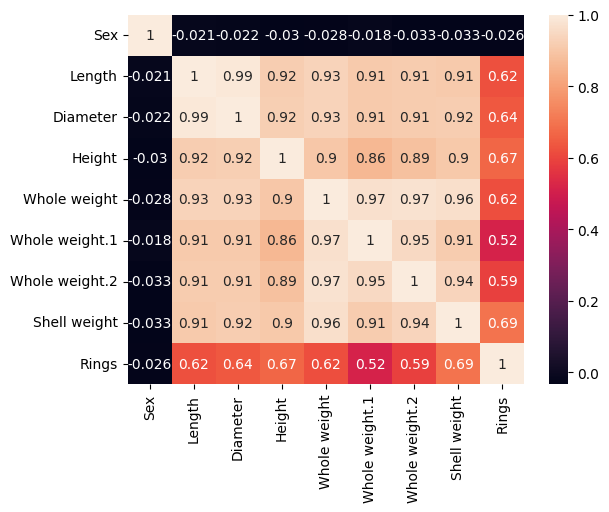

In [4]:
sns.heatmap(df.corr(), annot=True)

### Evaluation Metric - using a loss based metric (MAE) since its a regression problem
### you could either use an accuracy metric with a threshold (distance from ground truth) or a loss metric

In [5]:
def mean_absolute_error(y_true, y_pred):
    """
    Calculate the Mean Absolute Error (MAE).

    Parameters:
    y_true (list or array): True values.
    y_pred (list or array): Predicted values.

    Returns:
    float: MAE of the predictions.
    """
    errors = [abs(y_t - y_p) for y_t, y_p in zip(y_true, y_pred)]
    mae = sum(errors) / len(errors)
    return mae


### Train test splitting

In [6]:
X = df.iloc[:, :8].to_numpy()
Y = df.iloc[:, 8:].to_numpy()

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8)

In [8]:
X_train_tensor = torch.from_numpy(X_train)
Y_train_tensor = torch.from_numpy(Y_train)

### Decision Tree Regressor since we're dealing more of numerical data and less of categorical data (sex)

In [9]:
dtr = DecisionTreeRegressor()

In [10]:
dtr_fitted_model = dtr.fit(X_train, Y_train)

In [11]:
dtr_fitted_model.predict(X_test)

array([7., 8., 9., ..., 8., 9., 8.])

In [12]:
mean_absolute_error(Y_test, dtr_fitted_model.predict(X_test))

array([1.72504552])

### Random Forest Regressor

In [13]:
rfr = RandomForestRegressor()

In [14]:
rfr_fitted_model = rfr.fit(X_train, Y_train.reshape(-1))

In [15]:
mean_absolute_error(Y_test, rfr_fitted_model.predict(X_test))

array([1.26529383])

### Root Mean Squared Logarithmic Error (metioned in the competition)

In [16]:
mean_squared_log_error(Y_test, dtr_fitted_model.predict(X_test))

0.04568490751630822

In [18]:
mean_squared_log_error(Y_test, rfr_fitted_model.predict(X_test))

0.02364588326793544

In [20]:
df_test = pd.read_csv('test.csv')

In [21]:
df_test.head()
df_test.drop(columns=['id'], inplace=True)
label_encoder = LabelEncoder()
df_test['Sex'] = label_encoder.fit_transform(df_test['Sex'])

In [22]:
X = df_test.iloc[:, :8].to_numpy()
Y = df_test.iloc[:, 8:].to_numpy()

In [23]:
rfr_fitted_model.predict(X)

array([10.18,  9.88, 10.17, ..., 12.05, 12.01, 10.12])

In [24]:
df_sub = pd.DataFrame()

In [25]:
df_sub['Rings'] = rfr_fitted_model.predict(X)

In [26]:
df_sub['id'] = df_sub.index



In [30]:
df_sub['id'] = df_sub['id'].to_numpy() + 90615

In [31]:
df_sub.to_csv("submission.csv", index=False)

In [32]:
df_sub

,Rings,id
0,10.18,90615
1,9.88,90616
2,10.17,90617
3,10.88,90618
4,7.92,90619
...,...,...
60406,6.29,151021
60407,9.01,151022
60408,12.05,151023
60409,12.01,151024


In [33]:
df

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,0,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,1,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,2,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,1,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9
...,...,...,...,...,...,...,...,...,...
90610,2,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450,6
90611,2,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400,9
90612,1,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815,6
90613,1,0.345,0.270,0.075,0.2000,0.0980,0.0490,0.0700,6
